# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

## Создадим id отправителей

In [73]:
id_sender = []
for i in range(0, 100):
    id_sender.append(random.randint(100, 10000))

In [74]:
id_sender[1:5]

[6190, 5775, 8674, 4057]

## Создадим id получателей

In [75]:
id_receiver_nunique = [123450, 678900, 135790]

In [76]:
id_receiver = []
for i in range(0, 1000):
    res = random.choice(id_receiver_nunique)
    id_receiver.append(res)

In [77]:
len(id_receiver)

1000

## Создадим суммы переводов

In [78]:
amount = []
for i in range(100000):
    res = random.uniform(100.5, 1000000)
    amount.append(round(res,2))

## Итоговый датафрэйм с операциями

In [79]:
list_tuples = list(zip(id_sender, id_receiver, amount))

In [80]:
df = pd.DataFrame(list_tuples, columns = ['id_sender', 'id_receiver', 'amount'])

In [81]:
df

,id_sender,id_receiver,amount
0,2009,678900,2467.31
1,6190,123450,291499.20
2,5775,123450,885564.37
3,8674,135790,291279.74
4,4057,135790,394061.11
...,...,...,...
95,1512,135790,673155.11
96,4820,135790,661744.32
97,5256,678900,868045.36
98,3263,678900,224292.49


# Приступим к пострению графов

### Для начала выстроим группирированные данные

In [82]:
df_gr = df.groupby(['id_sender', 'id_receiver'], as_index= False).agg({'amount' : 'sum'})

In [83]:
df_gr

,id_sender,id_receiver,amount
0,165,135790,639964.11
1,218,123450,927287.62
2,265,123450,261152.33
3,306,123450,410957.93
4,417,135790,603536.02
...,...,...,...
95,9675,123450,552876.32
96,9704,123450,555289.26
97,9704,135790,852987.59
98,9744,123450,812085.37


In [84]:
G = nx.MultiDiGraph()

In [85]:
for index, key in enumerate(df_gr['amount']):
    G.add_edge(df_gr['id_sender'][index],
              df_gr['id_receiver'][index],
              df_gr['amount'][index])

In [86]:
len(G.nodes)

102

In [87]:
len(G.edges)

100

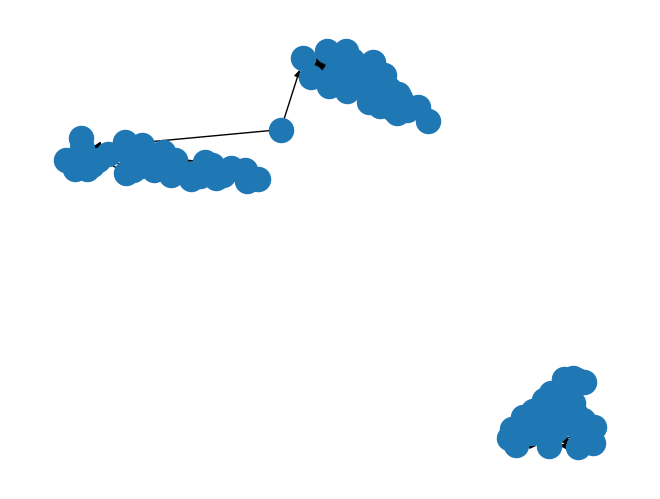

In [88]:
nx.draw(G)

# Как мывидим, граф получился не очень информативен. Добавим в него опции для нормального отображения

### Разделим по цветам (получаетль - красный, отправитель - голубой)

In [89]:
df_gr.columns

Index(['id_sender', 'id_receiver', 'amount'], dtype='object')

In [90]:
node_colors_dict = {}
for index, id in enumerate(df_gr['id_sender']):
    node_colors_dict[id] = 'blue' 

for index, id in enumerate(df_gr['id_receiver']):
    node_colors_dict[id] = 'red'

### Разделим по Размеру (получаетль - 400, отправитель - 300)

In [91]:
node_size_dict = {}
for index, id in enumerate(df_gr['id_sender']):
    node_size_dict[id] = 10

for index, id in enumerate(df_gr['id_receiver']):
    node_size_dict[id] = 300

### Размер ребер

In [93]:
df_gr.amount.quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

0.0      2467.310
0.2    258398.178
0.4    411398.396
0.6    607754.820
0.8    812149.074
1.0    983603.360
Name: amount, dtype: float64

In [95]:
def get_edge_size(sum):
    if sum <= df_gr.amount.quantile(0):
        return 0.1
    elif df_gr.amount.quantile(0) < sum <= df_gr.amount.quantile(1):
        return 0.3
    elif df_gr.amount.quantile(1) < sum <= df_gr.amount.quantile(2):
        return 0.5
    elif df_gr.amount.quantile(2) < sum <= df_gr.amount.quantile(3):
        return 1
    elif df_gr.amount.quantile(3) < sum <= df_gr.amount.quantile(4):
        return 2
    elif df_gr.amount.quantile(4) < sum <= df_gr.amount.quantile(5):
        return 3
    else:
        return 5

In [96]:
df_gr.columns

Index(['id_sender', 'id_receiver', 'amount'], dtype='object')

In [97]:
edge_sizes_dict = {}
for index, val in enumerate(df_gr['amount']):
    edge_sizes_dict[(df_gr.id_sender[index], df_gr.id_receiver[index], df_gr.amount[index])] = get_edge_size(val)

### Подписи к узлам:

In [111]:
labels_name = {}
for index, id in enumerate(df_gr['id_sender']):
    labels_name[df_gr.id_sender[index]] = df_gr.id_sender[index]
for index, id in enumerate(df_gr['id_receiver']):    
    labels_name[df_gr.id_receiver[index]] = df_gr.id_receiver[index]

    # в данном случае нет необходимости (на случай если необходимо испрпаить подпись не как названа нода)

## Запишем все показатели в списки

In [99]:
node_colors_list = []
node_size_list = []
edge_size_list = []
nodelabels = {}

for node in G.nodes:
    node_colors_list.append(node_colors_dict[node])
    node_size_list.append(node_size_dict[node])
    nodelabels[node] = labels_name

for edge in G.edges:
    edge_size_list.append(edge_sizes_dict[edge])

In [100]:
f = plt.figure(figsize = (175, 115))

<Figure size 17500x11500 with 0 Axes>

# Строим граф

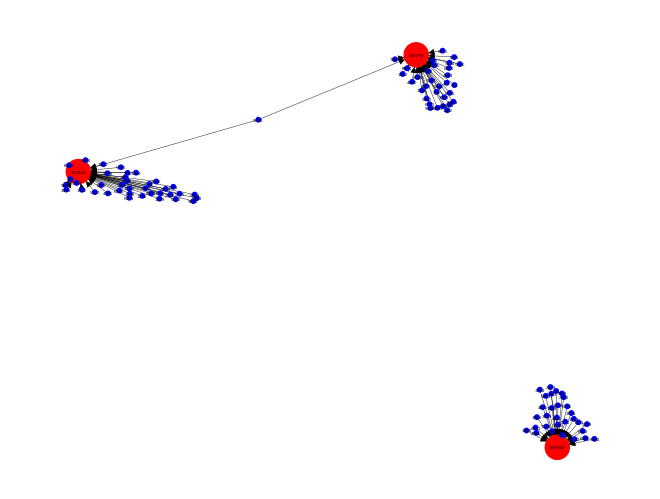

In [119]:
nx.draw(G,
       node_color = node_colors_list, # цвет узлов
       node_size = node_size_list, # размер узлов
       width = edge_size_list, #размер ребер
       with_labels = True, # чтобы подпись была
       font_size = 3, #размер подписи
       )